<a href="https://colab.research.google.com/github/elizabethavargas/baseball/blob/main/Predicting_Hit_Outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Hit a Home Run
Visualizations of associations with extra base hits and home runs

In [ ]:
import pandas as pd
import numpy as np

df2 = pd.read_csv("/content/baseball_pitch_level_2024.csv")
df2

,Unnamed: 0,game_date,game_pk,at_bat_number,pitch_number,gametype,site,hometeam,away_team,batter_team,...,launch_speed,launch_angle,age_bat,pitch_type,stand,p_throws,pitcher_batter_handedness,barrel,events,home_run
0,0,2024-09-30,747139,82,5,R,Truist Park,Atlanta Braves,NYM,ATL,...,87.6,-30.0,35,FF,R,R,1,0,field_out,0
1,1,2024-09-30,747139,82,4,R,Truist Park,Atlanta Braves,NYM,ATL,...,NaN,NaN,35,SL,R,R,1,0,NaN,0
2,2,2024-09-30,747139,82,3,R,Truist Park,Atlanta Braves,NYM,ATL,...,NaN,NaN,35,SL,R,R,1,0,NaN,0
3,3,2024-09-30,747139,82,2,R,Truist Park,Atlanta Braves,NYM,ATL,...,NaN,NaN,35,SL,R,R,1,0,NaN,0
4,4,2024-09-30,747139,82,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,NaN,NaN,35,SL,R,R,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709506,709506,2024-03-20,745444,2,1,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,NaN,NaN,30,FF,L,R,0,0,NaN,0
709507,709507,2024-03-20,745444,1,4,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,NaN,NaN,32,SI,R,R,1,0,NaN,0
709508,709508,2024-03-20,745444,1,3,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,NaN,NaN,32,SI,R,R,1,0,NaN,0
709509,709509,2024-03-20,745444,1,2,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,73.5,26.0,32,FF,R,R,1,0,NaN,0


In [ ]:
df2 = df2[(~df2.events.isna()) & df2.launch_angle.notna() & df2.launch_speed.notna()]
df2

,Unnamed: 0,game_date,game_pk,at_bat_number,pitch_number,gametype,site,hometeam,away_team,batter_team,...,launch_speed,launch_angle,age_bat,pitch_type,stand,p_throws,pitcher_batter_handedness,barrel,events,home_run
0,0,2024-09-30,747139,82,5,R,Truist Park,Atlanta Braves,NYM,ATL,...,87.6,-30.0,35,FF,R,R,1,0,field_out,0
11,11,2024-09-30,747139,80,7,R,Truist Park,Atlanta Braves,NYM,ATL,...,72.0,21.0,30,SL,R,R,1,0,single,0
18,18,2024-09-30,747139,79,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,76.1,58.0,30,FF,L,R,0,0,field_out,0
29,29,2024-09-30,747139,77,4,R,Truist Park,Atlanta Braves,NYM,ATL,...,86.7,-25.0,34,FF,R,R,1,0,field_out,0
33,33,2024-09-30,747139,76,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,107.2,35.0,31,CU,L,R,0,1,home_run,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709478,709478,2024-03-20,745444,8,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,76.6,19.0,34,SI,L,R,0,0,single,0
709490,709490,2024-03-20,745444,6,1,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,59.2,-31.0,25,FF,R,R,1,0,field_out,0
709491,709491,2024-03-20,745444,5,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,90.9,60.0,32,FF,R,R,1,0,field_out,0
709497,709497,2024-03-20,745444,4,2,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,86.6,33.0,29,FF,R,R,1,0,field_out,0


In [ ]:
# convert game_date to days in year
df2['game_date'] = pd.to_datetime(df2['game_date'])
df2['days_in_year'] = (df2['game_date'] - pd.Timestamp('2024-01-01')).dt.days

/tmp/ipython-input-2185299119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['game_date'] = pd.to_datetime(df2['game_date'])
/tmp/ipython-input-2185299119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['days_in_year'] = (df2['game_date'] - pd.Timestamp('2024-01-01')).dt.days


In [ ]:
# convert starttime to minutes
df2['starttime'] = pd.to_datetime(df2['starttime'])
df2['time_of_day_minutes'] = df2['starttime'].dt.hour * 60 + df2['starttime'].dt.minute

/tmp/ipython-input-3867153482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['starttime'] = pd.to_datetime(df2['starttime'])
/tmp/ipython-input-3867153482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time_of_day_minutes'] = df2['starttime'].dt.hour * 60 + df2['starttime'].dt.minute


In [ ]:
def categorize_event(event):
    if event == 'single':
      return 1
    elif event == 'double':
      return 2
    elif event == 'triple':
      return 3
    elif event == 'home_run':
      return 4
    else:
        return 0

df2['event_out'] = df2['events'].apply(categorize_event)
df2

/tmp/ipython-input-626694981.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['event_out'] = df2['events'].apply(categorize_event)


,Unnamed: 0,game_date,game_pk,at_bat_number,pitch_number,gametype,site,hometeam,away_team,batter_team,...,pitch_type,stand,p_throws,pitcher_batter_handedness,barrel,events,home_run,days_in_year,time_of_day_minutes,event_out
0,0,2024-09-30,747139,82,5,R,Truist Park,Atlanta Braves,NYM,ATL,...,FF,R,R,1,0,field_out,0,273,1031,0
11,11,2024-09-30,747139,80,7,R,Truist Park,Atlanta Braves,NYM,ATL,...,SL,R,R,1,0,single,0,273,1031,1
18,18,2024-09-30,747139,79,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,FF,L,R,0,0,field_out,0,273,1031,0
29,29,2024-09-30,747139,77,4,R,Truist Park,Atlanta Braves,NYM,ATL,...,FF,R,R,1,0,field_out,0,273,1031,0
33,33,2024-09-30,747139,76,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,CU,L,R,0,1,home_run,1,273,1031,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709478,709478,2024-03-20,745444,8,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,SI,L,R,0,0,single,0,79,607,1
709490,709490,2024-03-20,745444,6,1,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,FF,R,R,1,0,field_out,0,79,607,0
709491,709491,2024-03-20,745444,5,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,FF,R,R,1,0,field_out,0,79,607,0
709497,709497,2024-03-20,745444,4,2,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,FF,R,R,1,0,field_out,0,79,607,0


In [ ]:
# fill missing elevations
location_elevation_map = {
    'Williamsport': 525,  # Elevation in feet for Williamsport, PA
    'Birmingham': 644,    # Elevation in feet for Birmingham, AL
    'London': 11,         # Elevation in feet for London, UK
    'Mexico City': 7382,  # Elevation in feet for Mexico City, Mexico
    'Seoul': 125          # Elevation in feet for Seoul, South Korea
}

# Fill NaN values in 'elevation' based on location
df2['elevation'] = df2.apply(lambda row: location_elevation_map.get(row['location'], row['elevation']) if pd.isna(row['elevation']) else row['elevation'], axis=1)


/tmp/ipython-input-3539927782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['elevation'] = df2.apply(lambda row: location_elevation_map.get(row['location'], row['elevation']) if pd.isna(row['elevation']) else row['elevation'], axis=1)


In [ ]:
df2['wind_direction'] = df2.wind.str.split(',').str[1].str.strip()

def categorize_wind(direction):
    if direction in ['L To R', 'R To L']:
        return 'Crosswind'
    elif direction in ['Out To CF', 'Out To LF', 'Out To RF']:
        return 'Tailwind'
    elif direction in ['In From LF', 'In From RF', 'In From CF']:
        return 'Headwind'
    else:
        return 'Calm/Variable/None'

df2['wind_category'] = df2['wind_direction'].apply(categorize_wind)

/tmp/ipython-input-1931415140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wind_direction'] = df2.wind.str.split(',').str[1].str.strip()
/tmp/ipython-input-1931415140.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wind_category'] = df2['wind_direction'].apply(categorize_wind)


In [ ]:
def categorize_sky(sky):
  if sky in ['Cloudy', 'Overcast', 'Partly Cloudy', 'Unknown']:
    return 'Cloudy'
  elif sky in ['Dome', 'Roof Closed']:
    return 'Closed'
  elif sky in ['Drizzle', 'Rain']:
    return 'Rain'
  else:
    return sky

df2['sky_category'] = df2['sky'].apply(categorize_sky)

/tmp/ipython-input-461964409.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sky_category'] = df2['sky'].apply(categorize_sky)


In [ ]:
# encode categories
df2['handedness_combos'] = df2['stand'].astype(str) + '_' + df2['p_throws'].astype(str)

df2['turfType'] = (df2['turfType'] == 'Artificial Turf').astype(int)
df2

/tmp/ipython-input-2536181106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['handedness_combos'] = df2['stand'].astype(str) + '_' + df2['p_throws'].astype(str)
/tmp/ipython-input-2536181106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['turfType'] = (df2['turfType'] == 'Artificial Turf').astype(int)


,Unnamed: 0,game_date,game_pk,at_bat_number,pitch_number,gametype,site,hometeam,away_team,batter_team,...,barrel,events,home_run,days_in_year,time_of_day_minutes,event_out,wind_direction,wind_category,sky_category,handedness_combos
0,0,2024-09-30,747139,82,5,R,Truist Park,Atlanta Braves,NYM,ATL,...,0,field_out,0,273,1031,0,R To L,Crosswind,Cloudy,R_R
11,11,2024-09-30,747139,80,7,R,Truist Park,Atlanta Braves,NYM,ATL,...,0,single,0,273,1031,1,R To L,Crosswind,Cloudy,R_R
18,18,2024-09-30,747139,79,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,0,field_out,0,273,1031,0,R To L,Crosswind,Cloudy,L_R
29,29,2024-09-30,747139,77,4,R,Truist Park,Atlanta Braves,NYM,ATL,...,0,field_out,0,273,1031,0,R To L,Crosswind,Cloudy,R_R
33,33,2024-09-30,747139,76,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,1,home_run,1,273,1031,4,R To L,Crosswind,Cloudy,L_R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709478,709478,2024-03-20,745444,8,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,0,single,0,79,607,1,None,Calm/Variable/None,Closed,L_R
709490,709490,2024-03-20,745444,6,1,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,0,field_out,0,79,607,0,None,Calm/Variable/None,Closed,R_R
709491,709491,2024-03-20,745444,5,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,0,field_out,0,79,607,0,None,Calm/Variable/None,Closed,R_R
709497,709497,2024-03-20,745444,4,2,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,0,field_out,0,79,607,0,None,Calm/Variable/None,Closed,R_R


In [ ]:
# one hot encode df2[['pitch_type','wind_category', 'sky_category', 'handedness_combos']]
df2 = pd.get_dummies(df2, columns=['pitch_type','wind_category', 'sky_category', 'handedness_combos'])
df2

,Unnamed: 0,game_date,game_pk,at_bat_number,pitch_number,gametype,site,hometeam,away_team,batter_team,...,wind_category_Tailwind,sky_category_Clear,sky_category_Closed,sky_category_Cloudy,sky_category_Rain,sky_category_Sunny,handedness_combos_L_L,handedness_combos_L_R,handedness_combos_R_L,handedness_combos_R_R
0,0,2024-09-30,747139,82,5,R,Truist Park,Atlanta Braves,NYM,ATL,...,False,False,False,True,False,False,False,False,False,True
11,11,2024-09-30,747139,80,7,R,Truist Park,Atlanta Braves,NYM,ATL,...,False,False,False,True,False,False,False,False,False,True
18,18,2024-09-30,747139,79,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,False,False,False,True,False,False,False,True,False,False
29,29,2024-09-30,747139,77,4,R,Truist Park,Atlanta Braves,NYM,ATL,...,False,False,False,True,False,False,False,False,False,True
33,33,2024-09-30,747139,76,1,R,Truist Park,Atlanta Braves,NYM,ATL,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709478,709478,2024-03-20,745444,8,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,False,False,True,False,False,False,False,True,False,False
709490,709490,2024-03-20,745444,6,1,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,False,False,True,False,False,False,False,False,False,True
709491,709491,2024-03-20,745444,5,6,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,False,False,True,False,False,False,False,False,False,True
709497,709497,2024-03-20,745444,4,2,R,Gocheok Sky Dome,San Diego Padres,LAD,SD,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
# set batter home
df2['batter_home'] =(df2.batter_team != df2.away_team).astype(int)

# fix home for special games
special_locations = ['Seoul', 'Mexico City', 'London', 'Williamsport', 'Birmingham']
df2['batter_home'] = df2.apply(lambda row: 0 if row['location'] in special_locations else row['batter_home'], axis=1)

In [ ]:
y = df2['event_out']

X = df2[['at_bat_number', 'elevation','attendance',  'turfType', 'leftLine',
       'leftCenter', 'center', 'rightCenter', 'rightLine', 'wind_int',
       'temp',  'release_speed', 'launch_speed',
       'launch_angle', 'age_bat', 'barrel', 'days_in_year', 'time_of_day_minutes',
       'pitch_type_CH', 'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP',
       'pitch_type_FA', 'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FO',
       'pitch_type_FS', 'pitch_type_KC', 'pitch_type_KN', 'pitch_type_SC',
       'pitch_type_SI', 'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV',
       'wind_category_Calm/Variable/None', 'wind_category_Crosswind',
       'wind_category_Headwind', 'wind_category_Tailwind',
       'sky_category_Clear', 'sky_category_Closed', 'sky_category_Cloudy',
       'sky_category_Rain', 'sky_category_Sunny', 'handedness_combos_L_L',
       'handedness_combos_L_R', 'handedness_combos_R_L',
       'handedness_combos_R_R']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and standardized successfully.")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split and standardized successfully.
Shape of X_train_scaled: (99063, 47)
Shape of X_test_scaled: (24766, 47)
Shape of y_train: (99063,)
Shape of y_test: (24766,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train_scaled, y_train)

Random Forest Classifier model created and trained successfully.


Training Accuracy: 1.0000
Testing Accuracy: 0.7453


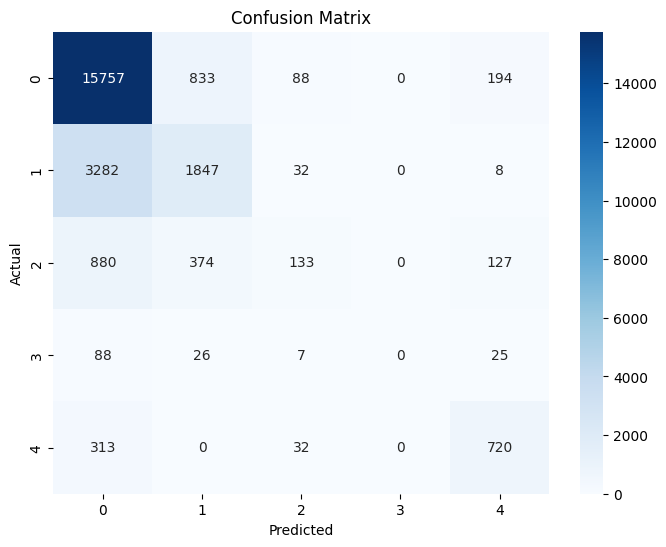

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

# Get the unique class labels from the training data
# This ensures all possible classes are represented in the matrix
labels = sorted(y_train.unique())

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()